# Transfer Learning for Document Classification

- [Introduction](#introduction)
- [Task 1: CoLA](#cola)
- [Task 2: SST-2](#sst2)
- [Task 3: MRPC](#mrpc)
- [Experimentation](#experimentation)
- [References](#references)
- [Resources](#resources)

<a id='Introduction'></a>

## Introduction

Transfer learning can be approximately defined as the process of pre-training a model using a large dataset on a particular task, and then fine-tuning with minor architectural modifications it on a new task, using the previously trained model as a starting point instead of a random initialization. The benefit of transfer learning is that it allows data scientists to achieve high levels of accuracy using minimal compute resources, labeled training data, and training time. In the context of client work, this benefit is inestimable, as clients often have lacking labeled training data, and want to see results quickly to understand the feasibility of their machine learning ideas.

Andrew Ng presented this chart at the NIPS 2016 conference, predicting that while pure Supervised Learning would continue to retain a dominant place in industry, Transfer Learning grow the most quickly in the near future. 

![](andrew-ng-2.png)

In recent years, there has indeed been an explosion of development in the field of Transfer Learning, and in particular for Natural Language Processing tasks, accelerating with the development of the transformer architecture and the concept of pre-training language models for fine-tuning on downstream NLP tasks. See the [Resources](#resources) section for a brief annotated summary of developments in the field and papers.

#### Approach

In this notebook, I demonstrate how to perform and evaluate transfer learning for document classification. Additionally, I explore a question that many papers ignore, which is how much data is required to generate good results? My approach for exploring this question is as follows: 
- First, I take three well-known datasets with established state of the art accuracy (SOTA) benchmarks (CoLA, SST-2, and MRPC). 
- Second, I reproduce approximately SOTA accuracy on all of them (see [leaderboard](https://gluebenchmark.com/leaderboard)). 
- Third, I evaluate how the accuracy and accuracy variance change as I use smaller versions of the same dataset for training. 

#### Technical Details

The specific model architecture in this notebook is BERT/RoBERTa described in (Devlin et. al. 2018)[[1](#bert)] and (Liu et. al., 2019)[[2](#roberta)]. The code contains several classes and utilities created to perform model training, model evaluation, and experiment running, as well as some utility functions were modified from the HuggingFace `transformers` library (Wolf et. al., 2019) [[3](#transformers)]. This notebook was run on a single `p3.2xlarge` instance.

In [1]:
from transfer_nlp_utils import *

<a id='cola'></a>

## Task 1: The Corpus of Linguistic Acceptability (CoLA)

- Task: Is a given sentence linguistically acceptable or not?
- Source: Published linguistics literature
- Training Size: 8550 observations
- More information: https://nyu-mll.github.io/CoLA/

![](cola2.png)

In [5]:
params = {
    'num_epochs': 10,
    'weight_decay': 0.1,
    'adam_epsilon': 1e-6,
    'model_name': 'roberta-large',
    'max_grad_norm': 1.0,
    'lr': 1e-5,
    'bs': 16,
    'device': 'cuda',
    'task': 'cola',
    'data_dir': '/home/ubuntu/glue_data/CoLA',
    'max_seq_length': 50,          
    'metric_name': 'mcc',
    'patience': 3,
    'seed': random.randint(1, 1000),
    'n': -1,
    'total_steps': 5336, 
    'warmup_steps': 320
      }

In [ ]:
set_seed(params['seed'])
dp = DataProcessor(params)
trainer = Trainer(params, dp, *get_training_objects(params))

In [7]:
trainer.fit()

Training roberta-large with lr = 1e-05,bs = 16, n = -1
------------------------------------------------------------------------------------------------------
Epoch   1/10 | Loss:  0.52 (T)  0.41 (V) | MCC: 0.351 (T) 0.614 (V) | LR: 9.6e-06 | Time: 140.83s 
------------------------------------------------------------------------------------------------------
Epoch   2/10 | Loss:  0.18 (T)  0.20 (V) | MCC: 0.657 (T) 0.653 (V) | LR: 8.5e-06 | Time: 139.75s 
------------------------------------------------------------------------------------------------------
Epoch   3/10 | Loss:  0.09 (T)  0.14 (V) | MCC: 0.782 (T) 0.673 (V) | LR: 7.4e-06 | Time: 139.31s 
------------------------------------------------------------------------------------------------------
Epoch   4/10 | Loss:  0.05 (T)  0.19 (V) | MCC: 0.857 (T) 0.658 (V) | LR: 6.4e-06 | Time: 132.32s 
------------------------------------------------------------------------------------------------------
Epoch   5/10 | Loss:  0.04 (T)  0.

<a id='sst2'></a>

## Task 2: Stanford Sentiment Treebank (SST-2)

- Task: Is a given sentence/phrase positive or not?
- Source: Movie reviews
- Training Size: 67350 observations
- More information: https://nlp.stanford.edu/sentiment/index.html

![](sst2.png)

In [8]:
params = {
    'num_epochs': 10,
    'warmup_ratio': 0.06,
    'weight_decay': 0.1,
    'adam_epsilon': 1e-6,
    'model_name': 'roberta-large',
    'max_grad_norm': 1.0,
    'lr': 1e-5,
    'bs': 32,
    'device': 'cuda',
    'task': 'sst-2',
    'data_dir': '/home/ubuntu/glue_data/SST-2',
    'max_seq_length': 50,
    'metric_name': 'acc',
    'patience': 3,
    'seed': random.randint(1, 1000),
    'n': -1,
    'total_steps': 20935, 
    'warmup_steps': 1256
      }

In [9]:
set_seed(params['seed'])
dp = DataProcessor(params)
trainer = Trainer(params, dp, *get_training_objects(params))

In [10]:
trainer.fit()

Training roberta-large with lr = 1e-05,bs = 32, n = -1
------------------------------------------------------------------------------------------------------
Epoch   1/10 | Loss:  0.28 (T)  0.18 (V) | ACC: 0.867 (T) 0.954 (V) | LR: 9.6e-06 | Time: 804.33s 
------------------------------------------------------------------------------------------------------
Epoch   2/10 | Loss:  0.07 (T)  0.10 (V) | ACC: 0.955 (T) 0.952 (V) | LR: 8.5e-06 | Time: 801.12s 
------------------------------------------------------------------------------------------------------
Epoch   3/10 | Loss:  0.04 (T)  0.05 (V) | ACC: 0.969 (T) 0.959 (V) | LR: 7.4e-06 | Time: 801.64s 
------------------------------------------------------------------------------------------------------
Epoch   4/10 | Loss:  0.02 (T)  0.05 (V) | ACC: 0.976 (T) 0.963 (V) | LR: 6.4e-06 | Time: 799.56s 
------------------------------------------------------------------------------------------------------
Epoch   5/10 | Loss:  0.01 (T)  0.

<a id='mrpc'></a>

## Task 3: Microsoft Research Paraphrase Corpus

- Task: Are these two sentences equivalent / paraphrases of each other? 
- Source: News sources around the web
- Training Size: 3570 observations
- More information: https://www.microsoft.com/en-us/download/details.aspx?id=52398

![](mrpc.png)

In [5]:
params = {
    'num_epochs': 10,
    'warmup_ratio': 0.06,
    'weight_decay': 0.1,
    'adam_epsilon': 1e-6,
    'model_name': 'roberta-large',
    'max_grad_norm': 1.0,
    'lr': 1e-5,
    'bs': 16,
    'device': 'cuda',
    'task': 'mrpc',
    'data_dir': '/home/ubuntu/glue_data/MRPC',
    'max_seq_length': 105,          
    'metric_name': 'acc_and_f1',
    'patience': 3,
    'seed': random.randint(1, 1000),
    'n': -1,
    'total_steps': 2296, 
    'warmup_steps': 137
      }

set_seed(params['seed'])
dp = DataProcessor(params)
trainer = Trainer(params, dp, *get_training_objects(params))

In [6]:
trainer.fit()

Training roberta-large with lr = 1e-05,bs = 16, n = -1
------------------------------------------------------------------------------------------------------
Epoch   1/10 | Loss:  0.60 (T)  0.46 (V) | ACC_AND_F1: 0.747 (T) 0.827 (V) | LR: 9.6e-06 | Time: 106.05s 
------------------------------------------------------------------------------------------------------
Epoch   2/10 | Loss:  0.20 (T)  0.15 (V) | ACC_AND_F1: 0.855 (T) 0.899 (V) | LR: 8.5e-06 | Time: 105.86s 
------------------------------------------------------------------------------------------------------
Epoch   3/10 | Loss:  0.09 (T)  0.11 (V) | ACC_AND_F1: 0.917 (T) 0.905 (V) | LR: 7.4e-06 | Time: 106.06s 
------------------------------------------------------------------------------------------------------
Epoch   4/10 | Loss:  0.04 (T)  0.11 (V) | ACC_AND_F1: 0.956 (T) 0.899 (V) | LR: 6.4e-06 | Time: 98.85s 
------------------------------------------------------------------------------------------------------
Epoch  

<a id='experimentation'></a>

## Experimentation

In [8]:
params = {
    'num_epochs': 10,
    'warmup_ratio': 0.06,
    'weight_decay': 0.1,
    'adam_epsilon': 1e-6,
    'model_name': 'roberta-large',
    'max_grad_norm': 1.0,
    'lr': 1e-5,
    'bs': 16,
    'device': 'cuda',
    'task': 'mrpc',
    'data_dir': '/home/ubuntu/glue_data/MRPC',
    'max_seq_length': 105,          
    'metric_name': 'acc_and_f1',
    'patience': 3,
    'seed': random.randint(1, 1000),
    'n': -1,
    'total_steps': 2296, 
    'warmup_steps': 137
      }

In [9]:
data_sizes = [100, 200, 400, 1000, 2000]
n_seeds = 5
experiment_name = 'data-size-1'
experiment = Experiment(data_sizes, n_seeds, experiment_name)
experiment.run(params)



------------------------------------------------------------------------------------------------------
Experiment 1/25: n = 100...
------------------------------------------------------------------------------------------------------
Training roberta-large with lr = 1e-05,bs = 16, n = 100
------------------------------------------------------------------------------------------------------
Epoch   1/10 | Loss:  0.67 (T)  0.64 (V) | ACC_AND_F1: 0.682 (T) 0.748 (V) | LR: 5.1e-07 | Time: 12.23s 
------------------------------------------------------------------------------------------------------
Epoch   2/10 | Loss:  0.33 (T)  0.32 (V) | ACC_AND_F1: 0.681 (T) 0.748 (V) | LR: 1e-06 | Time:  5.33s 
------------------------------------------------------------------------------------------------------
Epoch   3/10 | Loss:  0.23 (T)  0.21 (V) | ACC_AND_F1: 0.628 (T) 0.748 (V) | LR: 1.5e-06 | Time:  5.37s 
--------------------------------------------------------------------------------------

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Epoch   1/10 | Loss:  0.82 (T)  0.83 (V) | ACC_AND_F1: 0.217 (T) 0.158 (V) | LR: 5.1e-07 | Time: 12.08s 
------------------------------------------------------------------------------------------------------
Epoch   2/10 | Loss:  0.40 (T)  0.41 (V) | ACC_AND_F1: 0.288 (T) 0.158 (V) | LR: 1e-06 | Time:  5.34s 
------------------------------------------------------------------------------------------------------
Epoch   3/10 | Loss:  0.26 (T)  0.27 (V) | ACC_AND_F1: 0.265 (T) 0.158 (V) | LR: 1.5e-06 | Time:  5.33s 
------------------------------------------------------------------------------------------------------
Epoch   4/10 | Loss:  0.19 (T)  0.20 (V) | ACC_AND_F1: 0.301 (T) 0.158 (V) | LR: 2e-06 | Time:  5.33s 
------------------------------------------------------------------------------------------------------
Model stopped improving after epoch 1
Training complete 0.51m

GPU Utilization:  6.2% (1005 out of 16130)
Training roberta-large with lr = 1e-05,bs = 16, n = 100
----------

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Epoch   1/10 | Loss:  0.77 (T)  0.76 (V) | ACC_AND_F1: 0.166 (T) 0.158 (V) | LR: 5.1e-07 | Time: 12.08s 
------------------------------------------------------------------------------------------------------
Epoch   2/10 | Loss:  0.38 (T)  0.37 (V) | ACC_AND_F1: 0.166 (T) 0.158 (V) | LR: 1e-06 | Time:  5.35s 
------------------------------------------------------------------------------------------------------
Epoch   3/10 | Loss:  0.25 (T)  0.24 (V) | ACC_AND_F1: 0.283 (T) 0.170 (V) | LR: 1.5e-06 | Time: 12.01s 
------------------------------------------------------------------------------------------------------
Epoch   4/10 | Loss:  0.19 (T)  0.18 (V) | ACC_AND_F1: 0.359 (T) 0.393 (V) | LR: 2e-06 | Time: 12.02s 
------------------------------------------------------------------------------------------------------
Epoch   5/10 | Loss:  0.14 (T)  0.14 (V) | ACC_AND_F1: 0.538 (T) 0.401 (V) | LR: 2.6e-06 | Time: 12.05s 
-------------------------------------------------------------------

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Epoch   1/10 | Loss:  0.75 (T)  0.75 (V) | ACC_AND_F1: 0.302 (T) 0.158 (V) | LR: 9.5e-07 | Time: 14.65s 
------------------------------------------------------------------------------------------------------
Epoch   2/10 | Loss:  0.37 (T)  0.36 (V) | ACC_AND_F1: 0.395 (T) 0.330 (V) | LR: 1.9e-06 | Time: 14.62s 
------------------------------------------------------------------------------------------------------
Epoch   3/10 | Loss:  0.23 (T)  0.23 (V) | ACC_AND_F1: 0.488 (T) 0.385 (V) | LR: 2.8e-06 | Time: 14.62s 
------------------------------------------------------------------------------------------------------
Epoch   4/10 | Loss:  0.17 (T)  0.17 (V) | ACC_AND_F1: 0.646 (T) 0.743 (V) | LR: 3.8e-06 | Time: 14.65s 
------------------------------------------------------------------------------------------------------
Epoch   5/10 | Loss:  0.14 (T)  0.13 (V) | ACC_AND_F1: 0.673 (T) 0.748 (V) | LR: 4.7e-06 | Time: 14.58s 
---------------------------------------------------------------

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Epoch   1/10 | Loss:  0.85 (T)  0.90 (V) | ACC_AND_F1: 0.277 (T) 0.158 (V) | LR: 9.5e-07 | Time: 14.66s 
------------------------------------------------------------------------------------------------------
Epoch   2/10 | Loss:  0.43 (T)  0.42 (V) | ACC_AND_F1: 0.307 (T) 0.158 (V) | LR: 1.9e-06 | Time:  7.89s 
------------------------------------------------------------------------------------------------------
Epoch   3/10 | Loss:  0.26 (T)  0.26 (V) | ACC_AND_F1: 0.384 (T) 0.348 (V) | LR: 2.8e-06 | Time: 14.65s 
------------------------------------------------------------------------------------------------------
Epoch   4/10 | Loss:  0.18 (T)  0.18 (V) | ACC_AND_F1: 0.526 (T) 0.409 (V) | LR: 3.8e-06 | Time: 14.59s 
------------------------------------------------------------------------------------------------------
Epoch   5/10 | Loss:  0.14 (T)  0.13 (V) | ACC_AND_F1: 0.601 (T) 0.681 (V) | LR: 4.7e-06 | Time: 14.65s 
---------------------------------------------------------------

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Epoch   1/10 | Loss:  0.89 (T)  0.90 (V) | ACC_AND_F1: 0.226 (T) 0.158 (V) | LR: 9.5e-07 | Time: 14.65s 
------------------------------------------------------------------------------------------------------
Epoch   2/10 | Loss:  0.43 (T)  0.42 (V) | ACC_AND_F1: 0.287 (T) 0.177 (V) | LR: 1.9e-06 | Time: 14.68s 
------------------------------------------------------------------------------------------------------
Epoch   3/10 | Loss:  0.27 (T)  0.26 (V) | ACC_AND_F1: 0.402 (T) 0.395 (V) | LR: 2.8e-06 | Time: 14.61s 
------------------------------------------------------------------------------------------------------
Epoch   4/10 | Loss:  0.19 (T)  0.18 (V) | ACC_AND_F1: 0.488 (T) 0.391 (V) | LR: 3.8e-06 | Time:  7.94s 
------------------------------------------------------------------------------------------------------
Epoch   5/10 | Loss:  0.14 (T)  0.13 (V) | ACC_AND_F1: 0.549 (T) 0.686 (V) | LR: 4.7e-06 | Time: 14.67s 
---------------------------------------------------------------

In [16]:
data_sizes = [600]
n_seeds = 5
experiment_name = 'data-size-1'
experiment = Experiment(data_sizes, n_seeds, experiment_name)
experiment.run(params)



------------------------------------------------------------------------------------------------------
Experiment 1/5: n = 600...
------------------------------------------------------------------------------------------------------
Training roberta-large with lr = 1e-05,bs = 16, n = 600
------------------------------------------------------------------------------------------------------
Epoch   1/10 | Loss:  0.66 (T)  0.64 (V) | ACC_AND_F1: 0.735 (T) 0.748 (V) | LR: 2.8e-06 | Time: 25.18s 
------------------------------------------------------------------------------------------------------
Epoch   2/10 | Loss:  0.31 (T)  0.31 (V) | ACC_AND_F1: 0.762 (T) 0.748 (V) | LR: 5.5e-06 | Time: 18.27s 
------------------------------------------------------------------------------------------------------
Epoch   3/10 | Loss:  0.21 (T)  0.22 (V) | ACC_AND_F1: 0.769 (T) 0.748 (V) | LR: 8.3e-06 | Time: 18.48s 
-------------------------------------------------------------------------------------

<a id='results'></a>

## Results

In [17]:
da = experiment.inspect()
da.head()

,model_name,task,bs,lr,num_epochs,max_seq_length,n,seed,train_loss,valid_loss,train_acc,valid_acc
0,roberta-large,sst-2,32,0.00001,10,50,100,324,0.715153,0.697916,0.45,0.490826
1,roberta-large,sst-2,32,0.00001,10,50,100,78,0.697045,0.709773,0.55,0.509174
2,roberta-large,sst-2,32,0.00001,10,50,100,807,0.178653,0.173623,0.43,0.485092
3,roberta-large,sst-2,32,0.00001,10,50,100,407,0.685151,0.694709,0.57,0.509174
4,roberta-large,sst-2,32,0.00001,10,50,100,494,0.708919,0.696523,0.46,0.490826


In [18]:
dsst = da.loc[(da.model_name=='roberta-large') & (da.task=='sst-2')]
dcola = da.loc[(da.model_name=='roberta-large') & (da.task=='cola')]
dmrpc = da.loc[(da.model_name=='roberta-large') & (da.task=='mrpc')]

In [19]:
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline

def visualize_results(df, title=None, ref_line=None, marker=None):
    fig1, ax1 = plt.subplots(figsize=(12,6))
    ax1.plot(df.n, df.valid_acc,'ko', markersize=10, alpha=.4)
    ax1.plot(df.n, df.valid_acc, marker, markersize=7, alpha=.4)
    ax1.axhline(ref_line, linestyle='--', color='k')
    ax1.set_xscale('log')
    ax1.set_xlabel('Training Data Size')
    ax1.set_ylabel('Validation Accuracy')
    ax1.set_title(title)
    ax1.set_xticks(df.n.sort_values().unique().tolist())
    ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

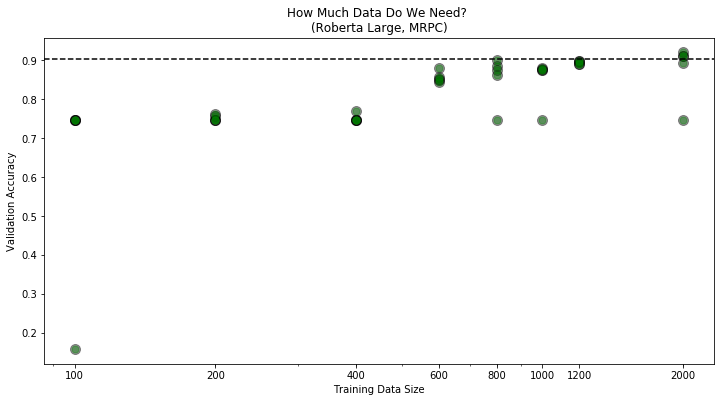

In [20]:
visualize_results(dmrpc, 'How Much Data Do We Need? \n(Roberta Large, MRPC)', .905, 'go')

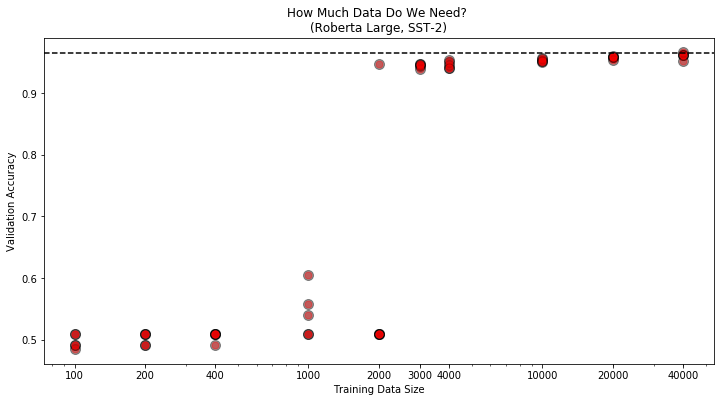

In [11]:
visualize_results(dsst, 'How Much Data Do We Need? \n(Roberta Large, SST-2)', .964, 'ro')

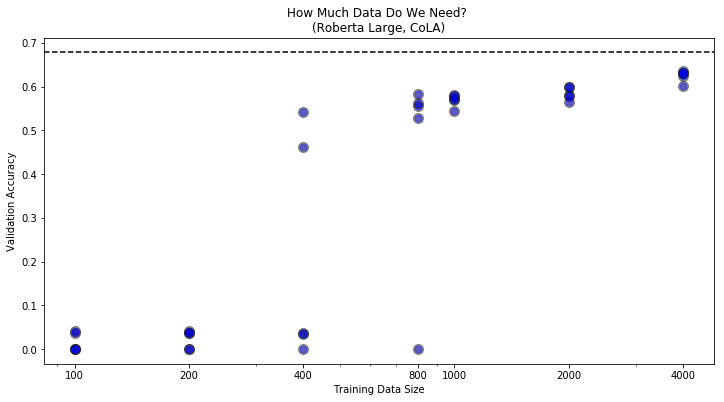

In [12]:
visualize_results(dcola, 'How Much Data Do We Need? \n(Roberta Large, CoLA)', .678, 'bo')

<a id='references'></a>

## References
<a id='bert'></a>
1. Jacob Devlin, Ming-Wei Chang, Kenton Lee, and Kristina Toutanova. 2019. *BERT: Pre-training of deep bidirectional transformers for language under-standing.* In North American Association for Computational Linguistics (NAACL).
<a id='roberta'></a>
2. Yinhan Liu, Myle Ott, Naman Goyal, Jingfei Du, Mandar Joshi, Danqi Chen, Omer Levy, Mike
Lewis, Luke Zettlemoyer, and Veselin Stoyanov. *RoBERTa: A robustly optimized BERT pretraining approach.* arXiv preprint arXiv:1907.11692, 2019.
<a id='transformers'></a>
3. Thomas Wolf, Lysandre Debut, Victor Sanh, Julien Chaumond, Clement Delangue, Anthony Moi, Pierric Cistac, Tim Rault, Rémi Louf, Morgan Funtowicz, Jamie Brew. *HuggingFace's Transformers: State-of-the-art Natural Language Processing.* arXiv:1910.03771, 2019.

<a id='resources'></a>

## Resources

* [Neural Machine Translation by Jointly Learning to Align and Translate (2014)](https://arxiv.org/pdf/1409.0473.pdf): Original paper popularizing the attention mechanism but in the context of RNN
* [Attention is all you need (2017)](https://arxiv.org/pdf/1706.03762.pdf): Google paper defining the scaled-dot product attenion mechanism, referred to as the Transformer architecture
* [Improving Language Understanding by Generative Pre-Training (pre-print)](https://s3-us-west-2.amazonaws.com/openai-assets/research-covers/language-unsupervised/language_understanding_paper.pdf): OpenAI paper introducing the idea of transfer learning with the transformer by pre-training a language model and then fine-tuning on several language classificaiton language tasks
* [BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding(2018)](https://arxiv.org/pdf/1810.04805.pdf): Extends the OpenAI paper by adding bidirectionality (via the cloze task) to the language modeling task and does well on NLP benchmarks
* [RoBERTa: A Robustly Optimized BERT Pretraining Approach (2019)](https://arxiv.org/pdf/1907.11692.pdf): Paper out of Facebook using the BERT architecture but training with much more data and larger batch sizes and simplifying the loss function.
* [`transformers`](https://github.com/huggingface/transformers): This is a nice library for transfer learning (not pre-training) for document and token classification tasks. Works well in PyTorch. Haven’t tried it out in TensorFlow. Has pre-trained models for the previously cited papers and a couple of additional ones.
* [Example on NER](https://github.com/huggingface/transformers/blob/master/examples/run_ner.py): From the same folks that created the `transformers` library.
* [Smaller, faster, cheaper, lighter: Introducing DistilBERT, a distilled version of BERT](https://medium.com/huggingface/distilbert-8cf3380435b5): This blog post introduces a smaller (66M compared to 340M) version of the BERT but with the same architecture.
* [Benchmarking Transformers: PyTorch and TensorFlow](https://medium.com/huggingface/benchmarking-transformers-pytorch-and-tensorflow-e2917fb891c2): This blog post shows how PyTorch and TensorFlow are pretty comparable in terms of inference time under a wide range of situations ([data](https://docs.google.com/spreadsheets/d/1sryqufw2D0XlUH4sq3e9Wnxu5EAQkaohzrJbd5HdQ_w/edit#gid=0)).